# Кластеризация. Домашнее задание

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import hdbscan

In [2]:
df = pd.read_excel('geo.xlsx').drop('Unnamed: 0', axis=1)
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
df = df.sample(frac = 0.1)
df.head()

,x,y,comment_class
14165,37.643309,55.734293,-1
54887,37.682350,55.751634,-1
85175,37.488808,55.658870,-1
57787,37.701834,55.765113,-1
97680,37.442437,55.844182,1


In [5]:
# points = np.array([[lat1, lon1], [lat2, lon2], ...])
# rads = np.radians(df[df.columns[0:2]])
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
df['cluster_labels'] = clusterer.fit_predict(df[df.columns[0:2]])

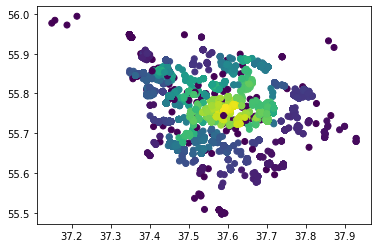

In [6]:
plt.scatter(df.x, df.y, c=df['cluster_labels'], cmap='viridis')

/var/folders/mh/7pw9bt550yzckllnzm5vbjp00000gn/T/ipykernel_13542/3126571696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['cluster_labels'] = clusterer.fit_predict(df_for[df_for.columns[0:2]])


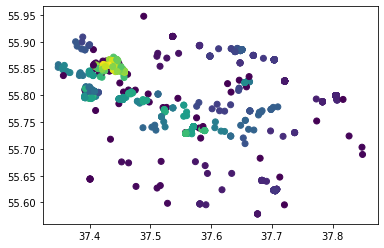

In [9]:
df_for = df[df['comment_class'] == 1]
df_for['cluster_labels'] = clusterer.fit_predict(df_for[df_for.columns[0:2]])
plt.scatter(df_for.x, df_for.y, c=df_for['cluster_labels'], cmap='viridis')

/var/folders/mh/7pw9bt550yzckllnzm5vbjp00000gn/T/ipykernel_13542/3556857849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against['cluster_labels'] = clusterer.fit_predict(df_against[df_against.columns[0:2]])


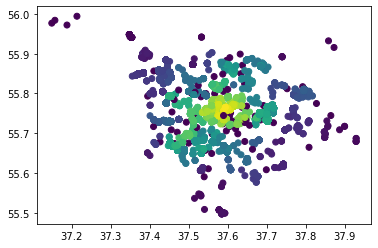

In [10]:
df_against = df[df['comment_class'] == -1]
df_against['cluster_labels'] = clusterer.fit_predict(df_against[df_against.columns[0:2]])
plt.scatter(df_against.x, df_against.y, c=df_against['cluster_labels'], cmap='viridis')

In [ ]:
X = np.array(list(zip(df.x, df.y))).reshape(len(df.x), 2)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [10]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

In [11]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

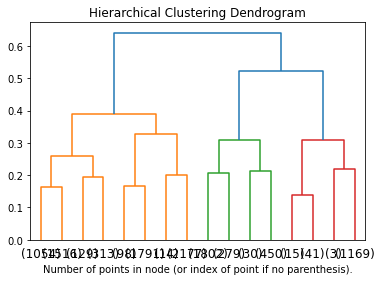

In [14]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(df[df.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

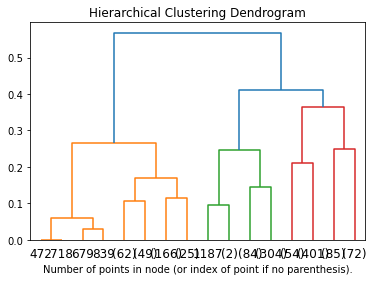

In [15]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
df_for = df[df['comment_class'] == 1]
model = model.fit(df_for[df_for.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

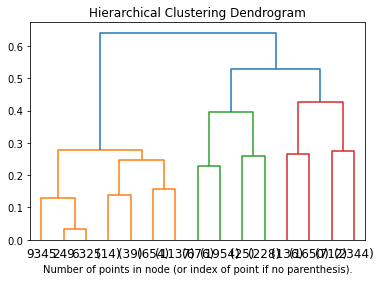

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
df_against = df[df['comment_class'] == -1]
model = model.fit(df_for[df_for.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()